[['Alabama', 'Autauga'], ['Alabama', 'Baldwin'], ['Alabama', 'Barbour'], ['Alabama', 'Bibb'], ['Alabama', 'Blount'], ['Alabama', 'Bullock'], ['Alabama', 'Butler'], ['Alabama', 'Calhoun'], ['Alabama', 'Chambers'], ['Alabama', 'Cherokee'], ['Alabama', 'Chilton'], ['Alabama', 'Choctaw'], ['Alabama', 'Clarke'], ['Alabama', 'Clay'], ['Alabama', 'Cleburne'], ['Alabama', 'Coffee'], ['Alabama', 'Colbert'], ['Alabama', 'Conecuh'], ['Alabama', 'Coosa'], ['Alabama', 'Covington'], ['Alabama', 'Crenshaw'], ['Alabama', 'Cullman'], ['Alabama', 'Dale'], ['Alabama', 'Dallas'], ['Alabama', 'DeKalb'], ['Alabama', 'Elmore'], ['Alabama', 'Escambia'], ['Alabama', 'Etowah'], ['Alabama', 'Fayette'], ['Alabama', 'Franklin'], ['Alabama', 'Geneva'], ['Alabama', 'Greene'], ['Alabama', 'Hale'], ['Alabama', 'Henry'], ['Alabama', 'Houston'], ['Alabama', 'Jackson'], ['Alabama', 'Jefferson'], ['Alabama', 'Lamar'], ['Alabama', 'Lauderdale'], ['Alabama', 'Lawrence'], ['Alabama', 'Lee'], ['Alabama', 'Limestone'], ['Alaba

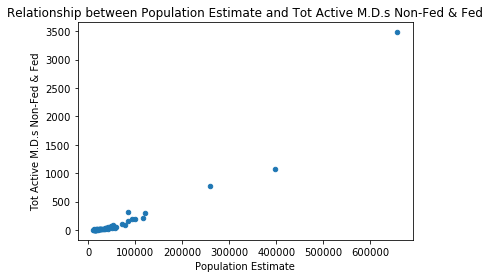

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd


class medical_set():
    """
    A class that contains a collection of methods to analyze and parse Area Health Resource Files(AHRF)
    
    INSTANCE ATTRIBUTES:
        ahrf_data: the full AHRF data in .asc form.
        tech: a subset of the AHRF 2016-2017 Technical Documentation.xlsx.
        subset:  a dictionary of the first 50 lines of AHRF data in the form of "subset[line0] = first line of the .asc file".
        working_set:  the set of data to export in the form of a nested list with every nested list containing
                      string values of the selected variables(up to 4 variables)[list of ["State Name", "County name","variable_1","variable_2]].
        var_col: a dictionary of the variable name and it's associated column numbers[var_col["Blank"] = "0001-0001"]
        variable_1: the first variable that is added to the working set. (can be empty) (is a string)
        variable_2: the second variable that is added to the working set. (can be empty) (is a string)
        variable_3: the third variable that is added to the working set. (can be empty) (is a string)
        variable_4: the fourth variable that is added to the working set. (can be empty) (is a string)
        
    """
    
    
    def __init__(self): 
        #initalize fields
        self.ahrf_data = open('ahrf2017.asc', 'r')
        self.tech=pd.read_excel('AHRF 2016-2017 Technical Documentation.xlsx', skiprows = 183, header=None, dtype= object, skip_footer = 499)
        self.subset= self._create_subset()
        self.working_set=self._create_working_set()
        self.var_col= self._var_col_creator()
        self.variable_1=""
        self.variable_2=""
        self.variable_3=""
        self.variable_4=""
            
            
    def get_variable_value(self,state_name,county_name,variable_name):
        """
        Returns value of the variable given the state_name, county_name, and variable_name
        
        Parameter state_name: The name of the state
        Precondition: state_name is a string and a valid name of a state in the subset of the asc.
        
        Parameter county_name: The name of the county
        Precondition: county_name is a string and a valid name of a state in the subset of the asc.
        
        Parameter variable_name: The name of the wanted variable
        Precondition: variable_name is a string and a valid name of a state in the subset of the asc.
        """
        col_start= int((self.var_col[variable_name])[0:6])-2
        col_end= int((self.var_col[variable_name])[7:12])-1
        for key in self.subset:
            if((self.subset[key])[44:63].strip()== state_name and (self.subset[key])[65:90].strip() == county_name):
                return ((self.subset[key])[col_start:col_end].strip())
            
            
    def append_working_set(self, variable_name):
        """
        Appends the values of the variables to working_set. Does nothing if all four additional variables are filled.
        
        Parameter variable_name: The name of the wanted variable
        Precondition: variable_name is a string and valid name of a variable from tech.
        """
        if (len(self.variable_1)<1):
            self.variable_1=variable_name
            for line in self.working_set:
                line.append(self.get_variable_value(line[0],line[1],variable_name))
        elif (len(self.variable_2)<1):
            self.variable_2=variable_name
            for line in self.working_set:
                line.append(self.get_variable_value(line[0],line[1],variable_name))
        elif (len(self.variable_3)<1):
            self.variable_3=variable_name
            for line in self.working_set:
                line.append(self.get_variable_value(line[0],line[1],variable_name))
        elif (len(self.variable_4)<1):
            self.variable_4=variable_name
            for line in self.working_set:
                line.append(self.get_variable_value(line[0],line[1],variable_name))
            
            
    def export(self):
        """
        Exports working_set into parsed_subset.csv with the first row being the variable names.
        """
        with open('parsed_subset.csv', 'w') as csvfile:
            filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
            filewriter.writerow(['State', 'County', self.variable_1, self.variable_2, self.variable_3, self.variable_4])
            filewriter.writerows(self.working_set)
            

    def plot(self,variable_plotx,variable_ploty):
        """
        Plots the two chosen variables from parsed_subset.csv in a simple graph.

        Parameter variable_plotx: The name of the variable to plot
        Precondition: variable_plotx is a string and a column with a numerical value in parsed_subset.csv

        Parameter variable_ploty: The name of the variable to plot
        Precondition: variable_ploty is a string and a column with a numerical value in parsed_subset.csv
        """
        parsed_subset = pd.read_csv('parsed_subset.csv')
        parsed_subset.plot(kind = 'scatter', x = variable_plotx, y = variable_ploty, title='Relationship between '+variable_plotx+' and '+variable_ploty)
        plt.show()
    
    
    def _create_subset(self):
        """
        Helper funciton to create subset field. 
        
        Reads through arhf_data and appends the first 50 lines to subset with the key
        in the form of "line{x}", where x is the line number.
        """
        subset={}
        for x in range(1,51):
            subset['line{0}'.format(x)]= self.ahrf_data.readline().strip() 
        return subset
    
    
    def _create_working_set(self):
        """
        Appends the values of the variables to working_set. 
        """
        working_set=[]
        for line in range(1,51):
            working_set.append([self.subset['line{0}'.format(line)][44:63].strip(), self.subset['line{0}'.format(line)][65:90].strip()])  
        return working_set
    
    
    def _var_col_creator(self):
        """
        Helper function to create var_col field.
        """
        var_col={}
        for x in range(1,7706):
            if(self.tech[3][x]!='NaN' and type(self.tech[3][x]) == str):
                var_col[(self.tech[3][x]).strip()]= self.tech[1][x]
        return var_col
        
        
example=medical_set()
print(example.working_set)
example.append_working_set("Tot Active M.D.s Non-Fed & Fed")
print(example.working_set)
example.append_working_set("Population Estimate")
print(example.working_set)
example.export()
example.plot("Population Estimate", "Tot Active M.D.s Non-Fed & Fed")





        

        
        
        
        
        
        
        
        
        
        
        
        
        
        
 



